<a href="https://colab.research.google.com/github/MarcoP01o/Wondrium-MachineLearning/blob/main/L01aux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We'll do a simple greenscreen replacement with a machine-learning model.

In the following code cells, we will:
- download and display an image
- pre-process the pixels, labeling background and foreground pixels
- train a model to identify green background pixels
- use the predictions of the model to swap the green screen background for an image of a forest

In [ ]:
import numpy as np
from keras.preprocessing import image

Download the image

In [ ]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/imgs/greenML.png

--2020-10-16 01:46:59--  https://github.com/mlittmancs/great_courses_ml/raw/master/imgs/greenML.png
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/imgs/greenML.png [following]
--2020-10-16 01:46:59--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/imgs/greenML.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1190198 (1.1M) [image/png]
Saving to: ‘greenML.png’

greenML.png         100%[===================>]   1.13M  7.56MB/s    in 0.2s    

2020-10-16 01:47:00 (7.56 MB/s) - ‘greenML.png’ saved [1190198/1190198]



Display the image using Keras

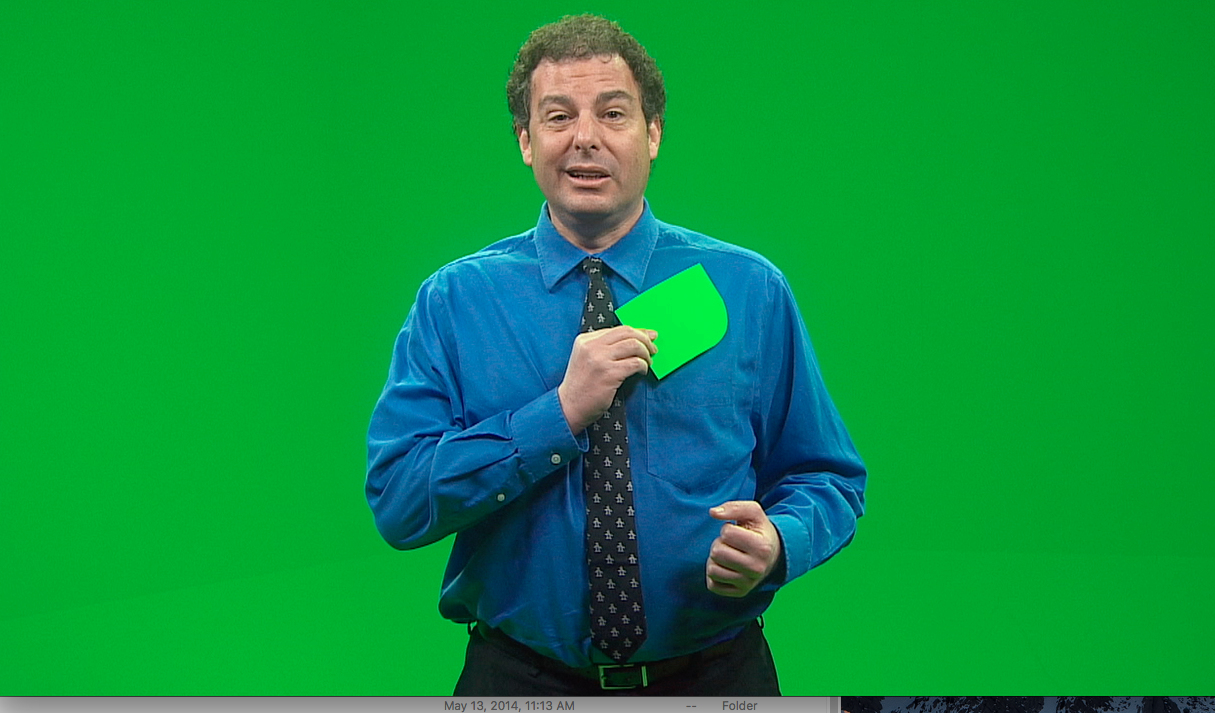

In [ ]:
img = image.load_img("greenML.png")

display(img)

Display a cropped version of the image

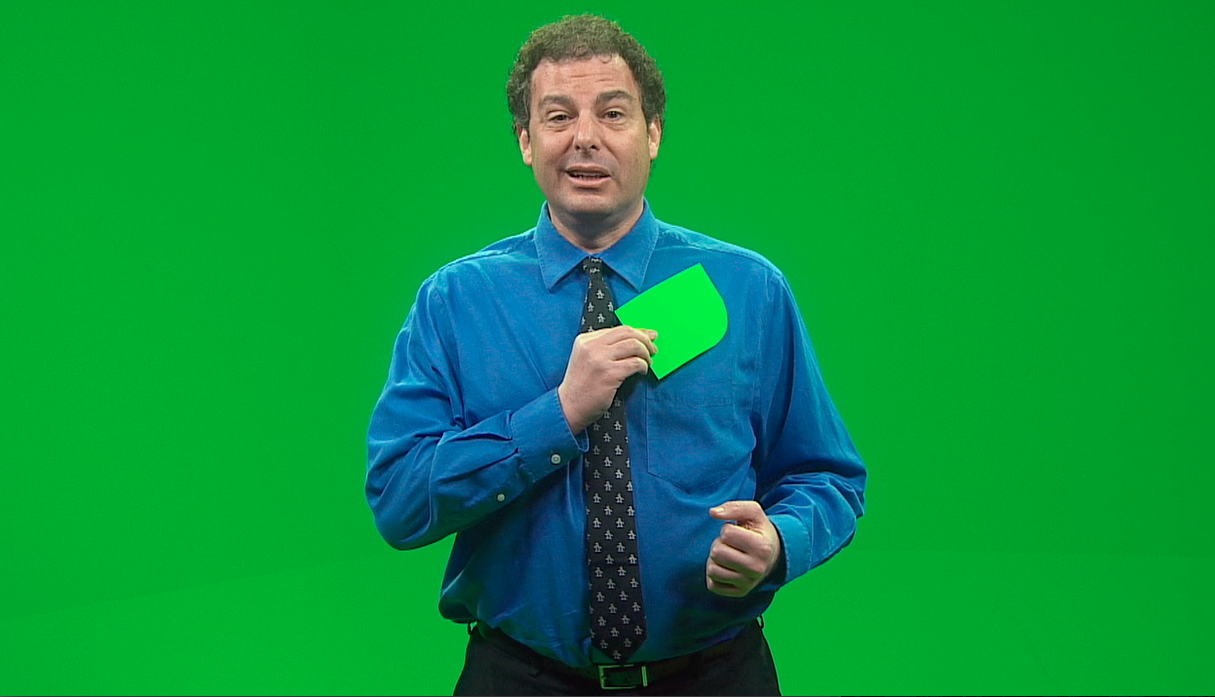

In [ ]:
arr = image.img_to_array(img)
# Trim off edges
arr = arr[:697,:]
display(image.array_to_img(arr,scale=False))

Isolate the background and make a dataset of background pixels, `YesSet`.

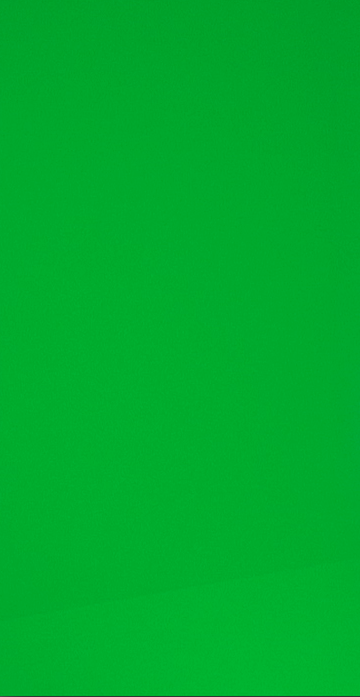

In [ ]:
# background
tmp = arr[:,:360]
display(image.array_to_img(tmp,scale=False))

YesSet = np.reshape(tmp,(-1,3))

Print the number dimensions of `tmp`.

In [ ]:
tmp.shape

(697, 360, 3)

Print the dimensions of `YesSet`.



In [ ]:
YesSet.shape

(250920, 3)

Build `seen` dictionary of the unique pixel colors in `yes_list`.  For all keys in the dictionary, the value is 1.

In [ ]:
seen = {}
for c in YesSet:
  col = str(c)
  if col not in seen: seen[col] = 1
len(seen)

306

Isolate part of the foreground and make a dataset of foreground pixels called `NoSet`.

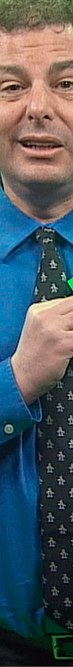

In [ ]:
# foreground
tmp = arr[30:,547:620]
display(image.array_to_img(tmp,scale=False))

NoSet = np.reshape(tmp,(-1,3))

Dimensions of the full image, corresponding to the height, width, and RGB (red, green, blue) colors.

In [ ]:
arr.shape

(697, 1215, 3)

We finalize our dataset, with a variable `alldat` cointaining our list of pixels, and `labs` holding our list of labels for each pixel (`0` for green background pixels and `1` for foreground pixels)

In [ ]:
# Build a list of pixels for both positive and negative examples.
alldat = np.concatenate((YesSet,NoSet))
 
# labels
labs = np.concatenate((np.ones(len(YesSet)), np.zeros(len(NoSet))))

A forest background.

In [ ]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/imgs/forest.jpg

--2020-10-16 01:50:00--  https://github.com/mlittmancs/great_courses_ml/raw/master/imgs/forest.jpg
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/imgs/forest.jpg [following]
--2020-10-16 01:50:01--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/imgs/forest.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 644548 (629K) [image/jpeg]
Saving to: ‘forest.jpg’

forest.jpg          100%[===================>] 629.44K  --.-KB/s    in 0.1s    

2020-10-16 01:50:01 (6.45 MB/s) - ‘forest.jpg’ saved [644548/644548]



We display the image of the forest, `img` and covert the image into an array, `bkg`.

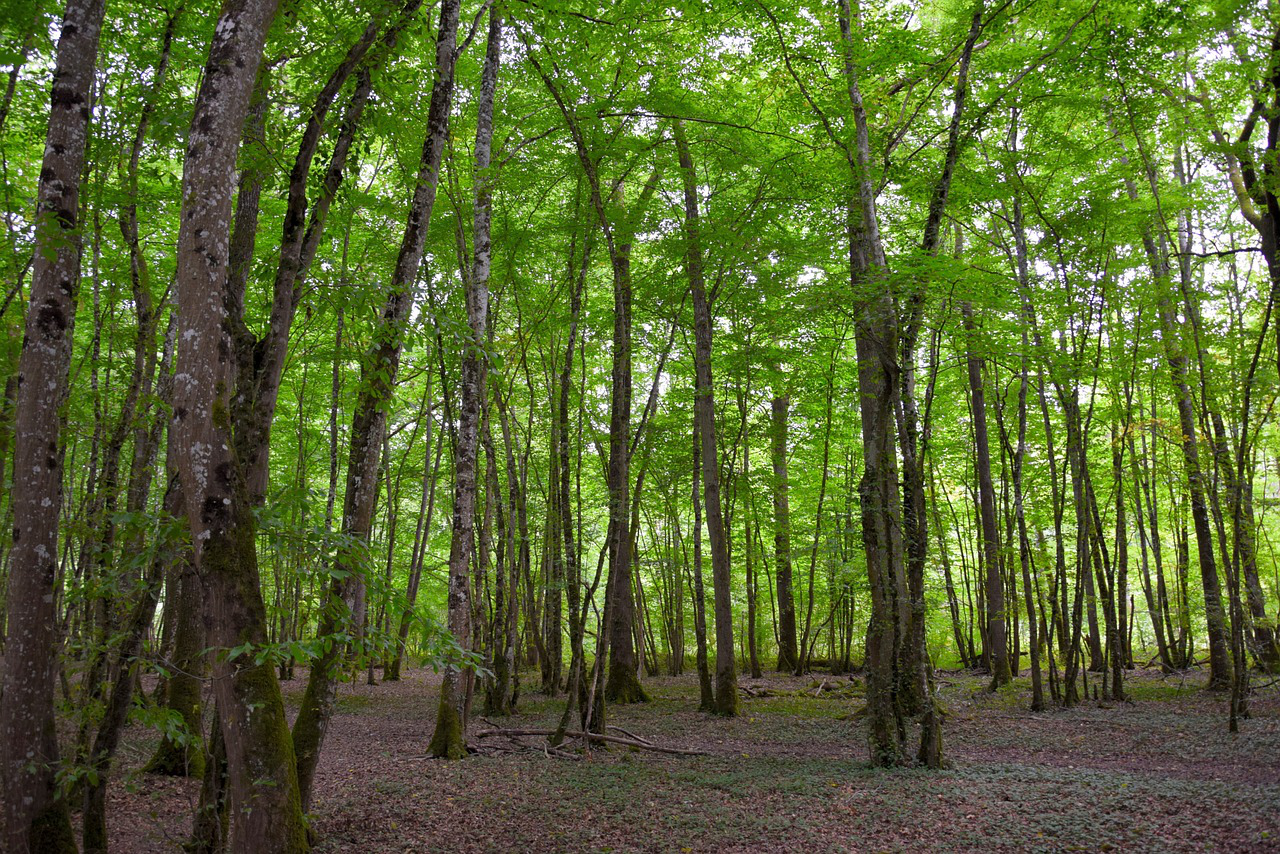

In [ ]:
img = image.load_img("forest.jpg")

display(img)

bkg = image.img_to_array(img)

Define drawScreen for merging foreground and background.

In [ ]:
import math

def distance(c1, c2):
  return(math.sqrt(  (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 + (c1[2]-c2[2])**2 ) )

def drawScreen(c, d, studio_image, background_image, ishift=157):
  i = 5
  display_image = studio_image.copy()
  for x in range(min(background_image.shape[0],studio_image.shape[0])):
    for y in range(min(background_image.shape[1], studio_image.shape[1])):
      fgi = i - ishift
      if distance(c, studio_image[x][y]) <= d:
        display_image[x][y] = background_image[x][y]
      else:
        if fgi >= 0: display_image[x][y] = studio_image[fgi][y]
  display(image.array_to_img(display_image,scale=False))

Put ML into the forest.

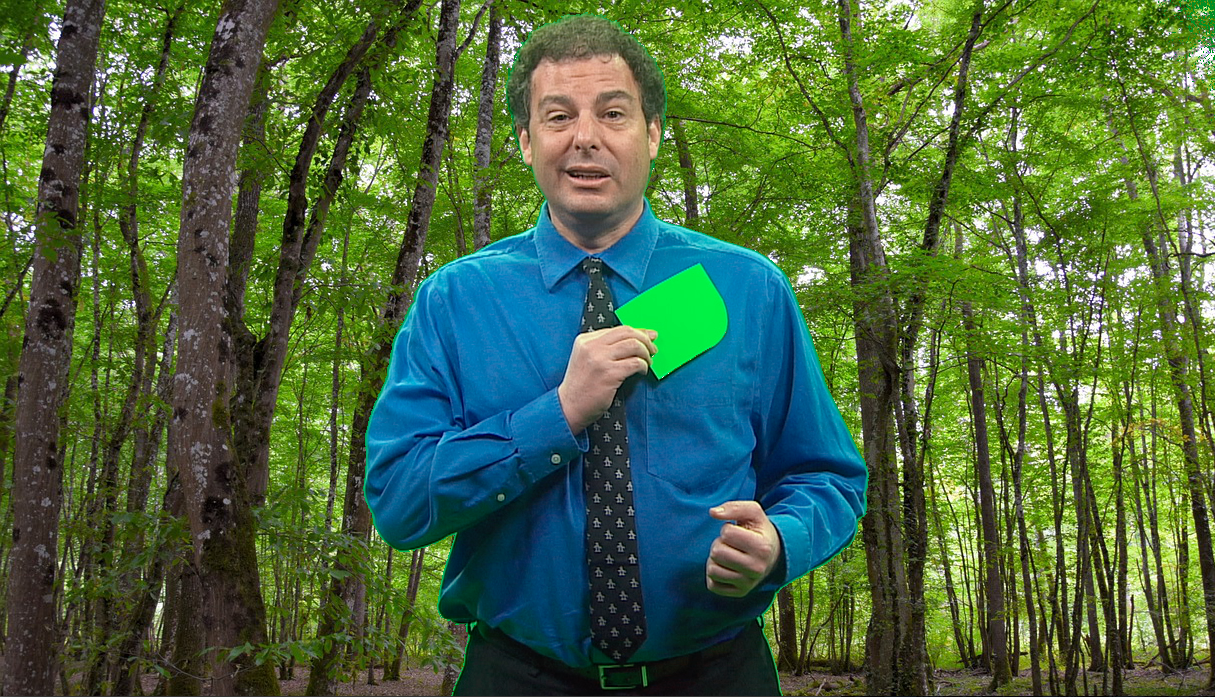

In [ ]:
drawScreen((0.3,174.5,46.7),math.sqrt(1000), arr, bkg)